In [5]:
import os
import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name=='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"

sns.set(font=font_family,rc={"axes.unicode_minus":False})

np.random.seed(100)

math_score=pd.DataFrame(np.random.randint(25,101,size=500),columns=["점수"])

scores=np.array(math_score['점수'])

n=20
nSample=100

sample_mean=np.array([np.random.choice(scores,n,).mean() for _ in range(nSample)])

In [6]:
from scipy.stats import t
t_95=t.ppf(1-(1-0.95)/2, df=20-1)

In [7]:
t_95

2.093024054408263

In [8]:
sMean=sample_mean.mean()
sStd=sample_mean.std()

Low_c=sMean-t_95*(sStd/math.sqrt(n))
Upper_c=sMean+t_95*(sStd/math.sqrt(n))
print(Low_c)
print(Upper_c)

print('신뢰구간:',Upper_c-Low_c)

59.199271219270706
63.951728780729304
신뢰구간: 4.752457561458598


In [9]:
z_n=30
sample1=np.random.choice(scores,z_n)
z_sMean=sample1.mean()
z_sStd=sample1.std()

print('모평균',scores.mean())
print('표본평균',z_sMean)
print('모편차',scores.std())
print('표본편차',z_sStd)

모평균 61.58
표본평균 64.76666666666667
모편차 21.491849617936563
표본편차 21.790951231085703


In [10]:
z_95=stats.norm.ppf(1-(1-0.95)/2)

In [11]:
L_value_1=round(z_sMean-z_95*(scores.std()/math.sqrt(z_n)),2)
U_value_1=round(z_sMean+z_95*(scores.std()/math.sqrt(z_n)),2)
print(L_value_1)
print(U_value_1)

print('신뢰구간:',U_value_1-L_value_1)

57.08
72.46
신뢰구간: 15.379999999999995


In [12]:
mStd=5
mMean=205
n=49

z_95_1=stats.norm.ppf(1-(1-0.95)/2)

L_value=round(mMean-z_95_1*(mStd/math.sqrt(n)),2)
U_value=round(mMean+z_95_1*(mStd/math.sqrt(n)),2)

print('신뢰구간:',L_value,'~',U_value)
print('신뢰구간 길이:',U_value - L_value)

print("{}<{}<{}".format(L_value,mMean,U_value))

신뢰구간: 203.6 ~ 206.4
신뢰구간 길이: 2.8000000000000114
203.6<205<206.4


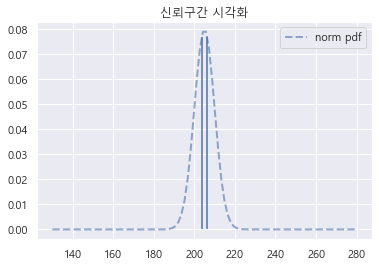

In [13]:
standard_norm=stats.norm(205,5)

x=np.linspace(130,280,100)

plt.vlines(L_value,0,standard_norm.pdf(L_value),colors="b")
plt.vlines(U_value,0,standard_norm.pdf(U_value),colors="b")
plt.plot(x,standard_norm.pdf(x),'b--',lw=2,alpha=0.6,label='norm pdf')

plt.title("신뢰구간 시각화")
plt.legend()
plt.show()